#Actividad: Problemas de regresión
Alejandro Pizarro</br>
Matrícula: A01633784</br>
Lunes 28 de agosto de 2023

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import (
    KFold, LeaveOneOut, ShuffleSplit, train_test_split, cross_val_score
)
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LinearRegression, Lasso, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import (
    SelectKBest, f_regression, SequentialFeatureSelector, RFE, r_regression
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy.linalg as ln
from sklearn import datasets, linear_model

# Now you can proceed with using these libraries in your code.


#Ejercicio 1
Las variables con las que se trabajaran dependen del último número de la matrícula: </br>
4 - Variable dependiente MR, variables independientes M, W, H y P

Siendo:</br>
MR = asesinatos por cada 100000 habitantes</br>
M = porcentaje de áreas metropolitanas</br>
W = porcentaje de gente blanca</br>
H = porcentaje de personas con preparatoria terminada</br>
P = porcentaje con ingresos por debajo del nivel de pobreza</br>

In [279]:
# Leemos el conjunto de datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/datasets/crime_data.csv')

# Eliminamos las columnas con las que no trabajaremos
columnas_a_eliminar = ['VR', 'S']
df = df.drop(columnas_a_eliminar, axis=1)
df.head()

,State,MR,M,W,H,P
0,AK,9.0,41.8,75.2,86.6,9.1
1,AL,11.6,67.4,73.5,66.9,17.4
2,AR,10.2,44.7,82.9,66.3,20.0
3,AZ,8.6,84.7,88.6,78.7,15.4
4,CA,13.1,96.7,79.3,76.2,18.2


####1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula

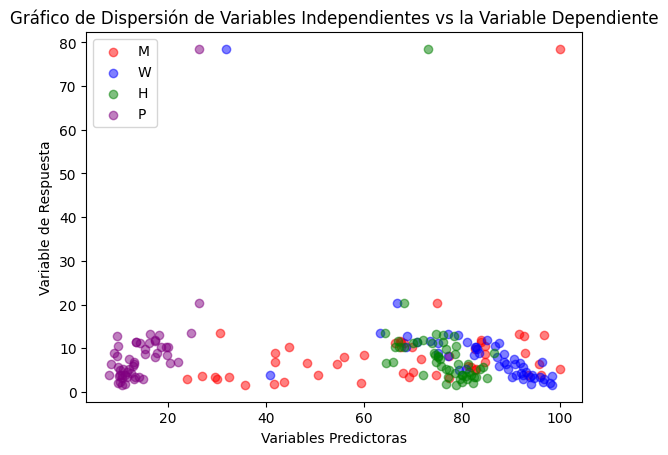

In [280]:
'''
1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula
'''
plt.scatter(df['M'], df['MR'], label='M', color='red', alpha=0.5)
plt.scatter(df['W'], df['MR'], label='W', color='blue', alpha=0.5)
plt.scatter(df['H'], df['MR'], label='H', color='green', alpha=0.5)
plt.scatter(df['P'], df['MR'], label='P', color='purple', alpha=0.5)

plt.xlabel('Variables Predictoras')
plt.ylabel('Variable de Respuesta')
plt.title('Gráfico de Dispersión de Variables Independientes vs la Variable Dependiente')
plt.legend()
plt.show()

####2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [281]:
'''
2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal,
y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras
asignadas a tu número de matrícula.
'''
x = np.array(df[['M', 'W', 'H', 'P']]) # Variables predictoras
y = np.array(df['MR']) # Variable de respuesta

# Agregar una columna de unos para el término independiente
X = np.column_stack((np.ones(x.shape[0]), x))

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X, y):
  return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
  return X @ beta

# Build linear model
beta = fit_model(X, y)
print('Model coefficients: ', beta)

# Evaluate residuals
y_pred = predict(X, beta)
r = y - y_pred

# Calculate MSE, MAE and R^2 with the training set
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

Model coefficients:  [-39.36237505   0.08937732  -0.41776537   0.72531944   1.5371259 ]
MSE:  35.303326150777515
MAE:  3.7156277068885037
R^2:  0.6865107390948453


####3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.


In [282]:
'''
3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.
'''
# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  beta_cv = fit_model(x_train, y_train)

  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]
  y_pred = predict(x_test, beta_cv)

  # Calculate MSE, MAE and R^2
  mse_i = mean_squared_error(y_test, y_pred)
  print('mse = ', mse_i)
  mse_cv.append(mse_i)

  mae_i = mean_absolute_error(y_test, y_pred)
  print('mae = ', mae_i)
  mae_cv.append(mae_i)

  r2_i = r2_score(y_test, y_pred)
  print('r^2= ', r2_i)
  r2_cv.append(r2_i)
  print('')

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:', np.average(r2_cv))

mse =  35.672252298617174
mae =  5.121324163787296
r^2=  -1.4216463914568438

mse =  108.54602839332924
mae =  4.779049084566088
r^2=  -7.165714659203729

mse =  9.544114587824735
mae =  2.6704129246649266
r^2=  0.07818395651515075

mse =  55.20325477376891
mae =  5.497459787279768
r^2=  -1.3520372372762672

mse =  303.74223514346994
mae =  7.219362261976217
r^2=  0.3492791646748852

MSE: 102.541577039402  MAE: 5.057521644454859  R^2: -1.9023870333493609


####4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.

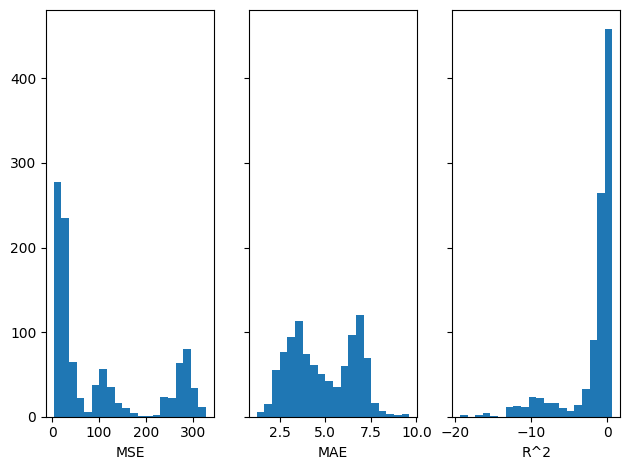

MSE: 98.70030209384946  MAE: 4.868751729127603  R^2: -1.7326892586172284


In [283]:
'''
4. Utiliza el método de validación cruzada asignado
a tu matrícula para mostrar los histogramas de R2
(sólo si es el método de Monte Carlo), MSE y MAE.
'''
# Find histograms of MSE and MAE and R^2 using Shuffle Split (Monter Carlo)
kf = ShuffleSplit(n_splits=1000, test_size = 0.2)

mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)
  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]
  y_pred = regr_cv.predict(x_test)
  # Calculate MSE, MAE and R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2_cv.append(r2_i)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

axs[2].hist(r2_cv, bins=20)
axs[2].set_xlabel("R^2")

plt.show()
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:', np.average(r2_cv))

####5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [284]:
'''
5. Agrega al conjunto de datos columnas que representen los cuadrados de las
variables predictoras (por ejemplo, M2, W2), así como los productos entre pares
de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este
nuevo conjunto de datos.
'''
# Agregar columnas de cuadrados y productos
df['M2'] = df['M'] ** 2
df['W2'] = df['W'] ** 2
df['H2'] = df['H'] ** 2
df['P2'] = df['P'] ** 2

df['MxW'] = df['M'] * df['W']
df['MxH'] = df['M'] * df['H']
df['MxP'] = df['M'] * df['P']

df['WxH'] = df['W'] * df['H']
df['WxP'] = df['W'] * df['P']

df['HxP'] = df['H'] * df['P']

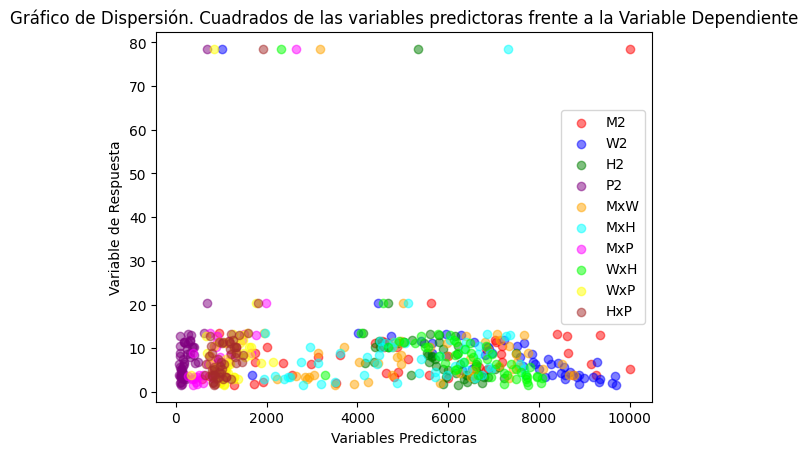

In [285]:
# 1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula

plt.scatter(df['M2'], df['MR'], label='M2', color='red', alpha=0.5)
plt.scatter(df['W2'], df['MR'], label='W2', color='blue', alpha=0.5)
plt.scatter(df['H2'], df['MR'], label='H2', color='green', alpha=0.5)
plt.scatter(df['P2'], df['MR'], label='P2', color='purple', alpha=0.5)

plt.scatter(df['MxW'], df['MR'], label='MxW', color='orange', alpha=0.5)
plt.scatter(df['MxH'], df['MR'], label='MxH', color='cyan', alpha=0.5)
plt.scatter(df['MxP'], df['MR'], label='MxP', color='magenta', alpha=0.5)

plt.scatter(df['WxH'], df['MR'], label='WxH', color='lime', alpha=0.5)
plt.scatter(df['WxP'], df['MR'], label='WxP', color='yellow', alpha=0.5)

plt.scatter(df['HxP'], df['MR'], label='HxP', color='brown', alpha=0.5)

plt.xlabel('Variables Predictoras')
plt.ylabel('Variable de Respuesta')
plt.title('Gráfico de Dispersión. Cuadrados de las variables predictoras frente a la Variable Dependiente')
plt.legend()
plt.show()

In [286]:
# 2. Implementación de regresión lineal. Modelo obtenido.
x2 = np.array(df[['M', 'W', 'H', 'P', 'M2', 'W2', 'H2', 'P2', 'MxW', 'MxH', 'MxP', 'WxH', 'WxP', 'HxP']]) # Variables predictoras
y2 = np.array(df['MR']) # Variable de respuesta

# Agregar una columna de unos para el término independiente
X2 = np.column_stack((np.ones(x2.shape[0]), x2))

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X2, y2):
  return np.linalg.inv(X2.transpose() @ X2) @ X2.transpose() @ y2

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X2, beta):
  return X2 @ beta

# Build linear model
beta2 = fit_model(X2, y2)
print('Model coefficients: ', beta2)

# Evaluate residuals
y_pred2 = predict(X2, beta2)
r2 = y2 - y_pred2

# Calculate MSE, MAE and R^2 with the training set
print('MSE: ', mean_squared_error(y2, y_pred2))
print("MAE: ", mean_absolute_error(y2, y_pred2))
print("R^2: ", r2_score(y2, y_pred2))

Model coefficients:  [-3.25113064e+02  1.08687952e+00  6.54618874e+00 -8.87160312e-01
  8.45799805e+00 -1.84322460e-03 -3.21933984e-03  3.60095579e-02
 -6.07368534e-02 -9.51354005e-03  1.87395455e-03 -1.02761388e-02
 -5.84703636e-02 -9.25236807e-02  2.91934607e-02]
MSE:  3.3224814328590306
MAE:  1.4051272908453045
R^2:  0.970496767236332


In [287]:
# 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

# Evaluate model with cross validation
n_folds2 = 5
kf2 = KFold(n_splits=n_folds2, shuffle = True)

mse_cv2 = []
mae_cv2 = []
r2_cv2 = []

for train_index2, test_index2 in kf.split(x2):
  # Training phase
  x_train2 = x2[train_index2, :]
  y_train2 = y2[train_index2]
  beta_cv2 = fit_model(x_train2, y_train2)

  # Test phase
  x_test2 = x2[test_index2, :]
  y_test2 = y2[test_index2]
  y_pred2 = predict(x_test2, beta_cv2)

  # Calculate MSE, MAE and R^2
  mse_i2 = mean_squared_error(y_test2, y_pred2)
  #print('mse = ', mse_i2)
  mse_cv2.append(mse_i2)

  mae_i2 = mean_absolute_error(y_test2, y_pred2)
  #print('mae = ', mae_i2)
  mae_cv2.append(mae_i2)

  r2_i2 = r2_score(y_test2, y_pred2)
  #print('r^2= ', r2_i2)
  r2_cv2.append(r2_i2)
  #print('')

print('MSE:', np.average(mse_cv2), ' MAE:', np.average(mae_cv2),' R^2:',
np.average(r2_cv2))

MSE: 111.71243381893899  MAE: 4.009789106274232  R^2: -1.3234897624342392


####6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

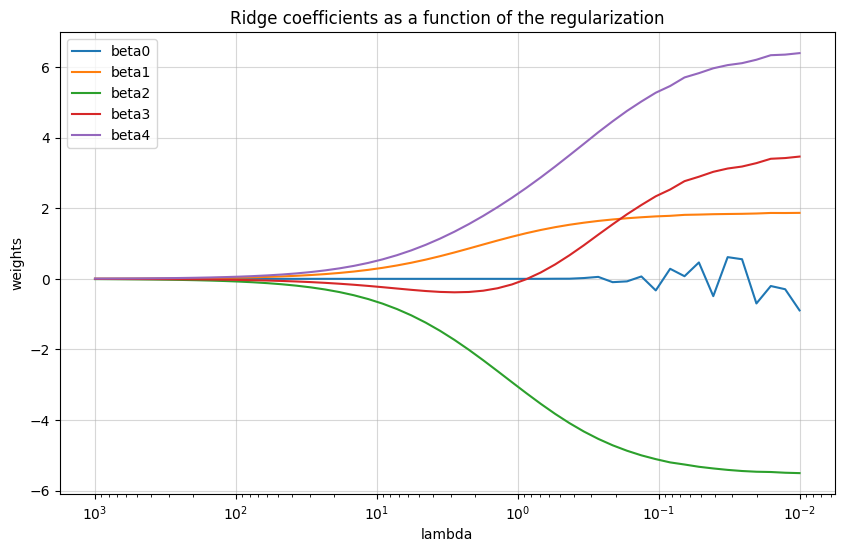

In [288]:
'''
6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico
de Ridge para el conjunto de datos original (sin las variables elevadas al
cuadrado).
'''
# Error function (it evaluates the mean squared error function for the specified model and data set).
def mse(X, y, beta):
  y_pred = X @ beta
  return (y - y_pred).sum()

# Gradient of error function (it evaluates the gradient of the mean squared error function for the specified model and data set).
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_modelRidge(x,y,lambd = 0.1, alpha = 0.0005, maxit = 10000):
  npredictors = x.shape[1]

  beta = 2 * np.random.rand(npredictors)-1.0

  it = 0
  while (np.linalg.norm(grad(x,y,beta,lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(x,y,beta,lambd)
    it = it + 1
  return beta

lambdas = np.logspace(-2,3,50)
coefs=[]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

for l in lambdas:
  betaR = fit_modelRidge(X_normalized, y, l)
  coefs.append(betaR)

plt.figure(figsize=(10, 6))
axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ['beta' + str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

plt.grid(True, alpha=0.5)
plt.show()

####7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?


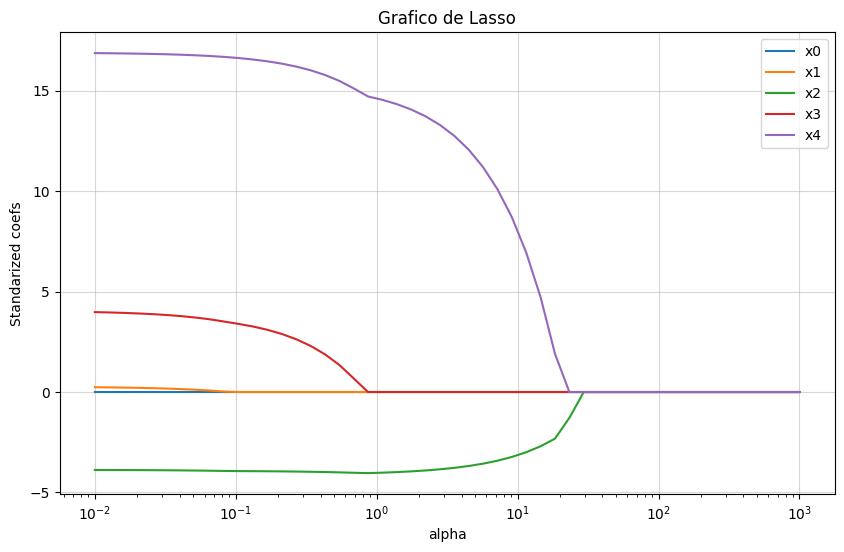

In [289]:
'''
7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de
datos original (sin las variables elevadas al cuadrado). ¿Qué variables son
más relevantes para el modelo?
'''
X_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.8,random_state=42)

alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Grafico de Lasso')
features = ['x' + str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)
plt.grid(True, alpha=0.5)
plt.show()

¿Qué variables son más relevantes para el modelo?

Las variables más significantes en un gráfico de regresión Lasso son las que sobreviven a esta penalización y mantienen coeficientes distintos a cero. Dicho esto, las variables que mantienen valores no nulos serían: x2, x3 y x4. Es importante mencionar que x1 no tiene un valor nulo pero al estar tan cerca del cero se considero que esta variable tiene una influencia débil en la predicción del modelo.

####8. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

**A. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

Basándonos en los resultados obtenidos, se llega a la conclusión de que el modelo de regresión lineal no resulta efectivo para la modelación de los datos en cuestión. Esta determinación se respalda en el hecho de que el valor del error cuadrático medio (MSE) se presenta significativamente alto, lo que apunta a que las predicciones generadas por el modelo exhiben un nivel considerable de error. Adicionalmente, el error absoluto medio (MAE) también se muestra considerablemente elevado, lo que sugiere que las predicciones no logran ajustarse adecuadamente a los datos. Por último, el coeficiente $R^2$ exhibe un valor negativo, pero al ser un modelo no lineal, R2 no tiene sentido alguno.

**B. ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada?**

Al comparar los valores, se puede observar una significante variabilidad en los valores de las métricas de evaluación en tre la aplicación de validación cruzada y su ausencia. Sin validación cruzada los resultados son los siguientes: MSE: 35.303, MAE:  3.715, R2:0.686 Sin embargo, al implementar la validación cruzada, estos valores aumentan a MSE: 96.917,  MAE: 4.609,  R2: -2.939 Esto nos puede indicar que el modelo esta experimentando un sobreajuste en la validación cruzada, resultando en un peor rendimiento en datos nuevos.

**C. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?**

En función de las métricas de evaluación (MSE, MAE y R2), se puede concluir que el modelo cuadrático demuestra un desempeño superior al modelo lineal en la predicción de datos de criminalidad.</br>
Lineal:</br>
MSE:  35.303326150777515</br>
MAE:  3.7156277068885037</br>
R^2:  0.6865107390948453</br>
Cuadrático:</br>
MSE:  3.3224814328590306</br>
MAE:  1.4051272908453045</br>
R^2:  0.970496767236332</br>
El menor MSE, MAE y mayor R2 del modelo cuadrático indican que este modelo se ajusta de manera más precisa y captura mejor la variabilidad en los datos.

**D. ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**

Las variables más relevantes para el modelo Ridge y Lasso son las que sobreviven a esta penalización y mantienen coeficientes distintos a cero. Dicho esto, las variables que mantienen valores no nulos serían: x2, x3 y x4.

**E. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

Una observación a destacar es la mejora significativa en la variable de respuesta (MR) al aplicar la operación de elevar al cuadrado las variables predictoras y multiplicar pares de estas. Este enfoque parece haber tenido un impacto positivo en la capacidad del modelo para predecir con mayor precisión la variable de respuesta. Esta relación nos sugiere que la inclusión de términos cuadráticos y productos cruzados entre variables puede capturar de manera más efectiva patrones y relaciones complejas en los datos, lo que conduce a una mejora en el rendimiento predictivo del modelo.



#Ejercicio 2
Las variables con las que se trabajaran dependen del penúltimo número de la matrícula: </br>
8, 9 - Todas las variables, menos X5, X9, X13, X17

Siendo:</br>
X1 - Adult mortality</br>
X2 - Infant deaths</br>
X3 - Alcohol</br>
X4 - Percentage expenditure</br>
X6 - Measles</br>
X7 - BMI</br>
X8 - Under-five deaths</br>
X10 - Total expenditure</br>
X11 - Diphtheria</br>
X12 - HIV/AIDS</br>
X14 - Population</br>
X15 - Thinness  1-19 years</br>
X16 - Thinness 5-9 years</br>
X18 - Schooling</br>


In [290]:
# Leemos el conjunto de datos
life_expectancy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/datasets/Life Expectancy Data.csv')

# Eliminamos las columnas con las que no trabajaremos
drop_columnas = ['Hepatitis B', 'Polio', 'GDP', 'Income composition of resources']
life_expectancy_data = life_expectancy_data.drop(drop_columnas, axis=1)
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


In [291]:
# Obtenemos el nombre de las columnas
life_expectancy_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Schooling'],
      dtype='object')

In [292]:
# Variables predictoras
x = life_expectancy_data[['Adult Mortality', 'infant deaths', 'Alcohol',
                          'percentage expenditure', 'Measles ', ' BMI ',
                          'under-five deaths ', 'Total expenditure',
                          'Diphtheria ', ' HIV/AIDS', 'Population',
                          ' thinness  1-19 years',' thinness 5-9 years',
                          'Schooling']].fillna(0).values

# Variable de respuesta
y = life_expectancy_data['Life expectancy '].fillna(0).values

####1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.


In [293]:
'''
1. Evalúa con validación cruzada un modelo de regresión lineal para las
variables asignadas según tu matrícula utilizando alguna librería o framework.
'''
# Modelo de regresion lineal
regr = LinearRegression()

# Realizamos validación cruzada con 5 folds
score = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_squared_error')

# Calculamos el error cuadratico promedio (MSE)
mean_mse = -score.mean()

print("Error cuadrático medio promedio:", mean_mse)

Error cuadrático medio promedio: 39.96484092458328


####2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [294]:
'''
2. Encuentra el número óptimo de predictores para el modelo utilizando el método
filter y validación cruzada. Una vez que tengas el número óptimo, muestra las
características seleccionadas.
'''
# Use sequential feature selection to reduce the number of features of the data set to the half
features = x
n_features = len(features)
fselection = SelectKBest(r_regression, k = 5)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())

Selected features:  ['x2' 'x3' 'x5' 'x8' 'x13']


In [295]:
# Fit model using the new data set and evaluate MSE, MAU and R^2
regr = linear_model.LinearRegression()
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

y_pred = regr.predict(x_transformed)
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

Model coefficients:  [2.53282336e-01 6.78154299e-04 1.28461915e-01 9.06207529e-02
 7.00093236e-01]
Model intercept:  47.19168563146025
MSE:  56.69706367681666
MAE:  4.980567700414434
R^2:  0.468230689594341


MSE: 56.8153973891926  MAE: 4.9861878619108335  R^2: 0.4703645618664103
---- n features = 1
MSE: 73.03247013248111  MAE: 5.664160803146501  R^2: 0.31684445394821753
---- n features = 2
MSE: 64.64186469686679  MAE: 5.272255475762598  R^2: 0.39279542946529855
---- n features = 3
MSE: 60.12070594378697  MAE: 5.066122615605723  R^2: 0.4366244303809708
---- n features = 4
MSE: 58.73656947755025  MAE: 5.088267964995395  R^2: 0.4475079185233362
---- n features = 5
MSE: 57.16840279938649  MAE: 4.999115242721791  R^2: 0.4681956427051386
---- n features = 6
MSE: 56.9201621930642  MAE: 4.998764448294287  R^2: 0.46626312690161065
---- n features = 7
MSE: 57.061193837550036  MAE: 4.994731881606406  R^2: 0.47090778707747044
---- n features = 8
MSE: 56.817654004751354  MAE: 5.002555373007477  R^2: 0.4676133627752825
---- n features = 9
MSE: 57.176449121022664  MAE: 5.007136465141602  R^2: 0.46602969778118775
Optimal number of features:  8


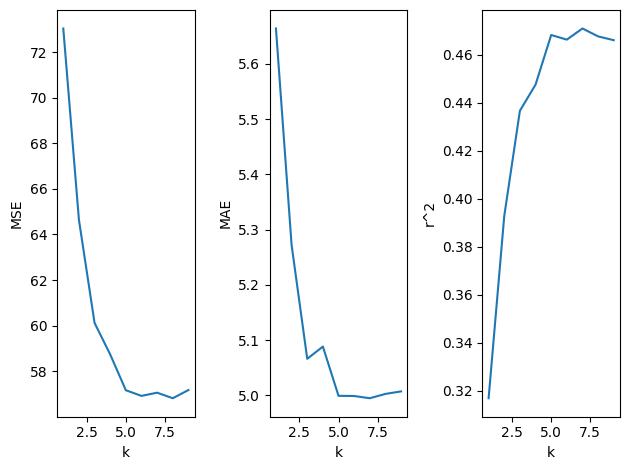

In [296]:
# Evaluate sequential feature selection using cross validation
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]

  fselection_cv = SelectKBest(r_regression, k=5)
  fselection_cv.fit(x_train, y_train)
  x_train = fselection_cv.transform(x_train)

  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)

  # Test phase
  x_test = fselection_cv.transform(x[test_index, :])
  y_test = y[test_index]
  y_pred = regr_cv.predict(x_test)

  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv.append(mse_i)

  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv.append(mae_i)

  r2_i = r2_score(y_test, y_pred)
  r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:', np.average(r2_cv))

# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
  print('---- n features =', n_feat)

  mse_cv = []
  mae_cv = []
  r2_cv = []

  kf = KFold(n_splits=5, shuffle = True)

  for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    fselection_cv = SelectKBest(r_regression, k = n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

  mse = np.average(mse_cv)
  mse_nfeat.append(mse)

  mae = np.average(mae_cv)
  mae_nfeat.append(mae)

  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)

  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()


####3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [297]:
'''
3. Repite el paso anterior pero con selección de características secuencial (Wrapper).
Reporta los predictores óptimos encontrados por el método.
'''
# Select features
regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = 0.5)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set and evaluate MSE, MAU and R^2
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

y_pred = regr.predict(x_transformed)

print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

Selected features:  ['x0' 'x2' 'x3' 'x5' 'x8' 'x9' 'x13']
Model coefficients:  [-1.96215245e-02  3.17091527e-01  4.73291986e-04  6.80160807e-02
  6.68474896e-02 -5.52937611e-01  5.82612789e-01]
Model intercept:  56.81920161384925
MSE:  39.241447809548056
MAE:  3.7277101215564814
R^2:  0.6319492353263495


MSE: 39.71247810851838   MAE: 3.7429211407415304   R^2: 0.6278450823191623
----- Optimal selection of number of features -----
---- n features = 1
MSE: 67.22595922195313   MAE: 5.185076487678536   R^2: 0.3690589334521368
---- n features = 2
MSE: 53.00844797197781   MAE: 4.23378847044852   R^2: 0.5061068591420553
---- n features = 3
MSE: 47.274013875459914   MAE: 4.066907432519199   R^2: 0.5578165770068529
---- n features = 4
MSE: 44.57598171660335   MAE: 4.064764212144482   R^2: 0.5803858160478187
---- n features = 5
MSE: 41.59634325393537   MAE: 3.91066433569591   R^2: 0.610781561959867
---- n features = 6
MSE: 40.44383998314382   MAE: 3.791360537712413   R^2: 0.6279879420072445
---- n features = 7
MSE: 39.647543250978465   MAE: 3.737310601208802   R^2: 0.6323269761691639
---- n features = 8
MSE: 39.644142200614674   MAE: 3.739594399138685   R^2: 0.6286085342304772
---- n features = 9
MSE: 39.970059359098656   MAE: 3.753330982524497   R^2: 0.6417264963730098
Optimal number of features

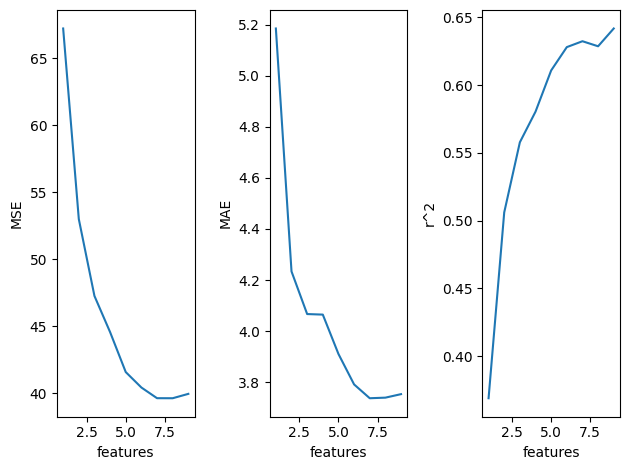

Selected features:  ['x0' 'x2' 'x3' 'x5' 'x8' 'x9' 'x11' 'x13']
Model coefficients:  [-1.94477375e-02  2.86686009e-01  4.58792819e-04  5.84604244e-02
  6.67685176e-02 -5.44987746e-01 -1.18927429e-01  5.81375989e-01]
Model intercept:  57.86955402380707


In [298]:
# Evaluate model using cross validation
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = linear_model.LinearRegression()

    fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)


print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = linear_model.LinearRegression()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

####4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [299]:
'''
4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de
características recursivo (Filter-Wrapper). Reporta los predictores óptimos
encontrados por el método.

'''
# Select features
regr = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select = 0.5)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set and evaluate MSE, MAU and R^2
x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

y_pred = regr.predict(x_transformed)

print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

Selected features:  ['x1' 'x2' 'x5' 'x6' 'x9' 'x12' 'x13']
Model coefficients:  [ 0.17396351  0.45121516  0.07979478 -0.13005622 -0.75163158 -0.14266286
  0.78858516]
Model intercept:  57.285896896203056
MSE:  43.51615485857659
MAE:  4.245509518030509
R^2:  0.5918561886633773


MSE: 45.86423684055883   MAE: 4.4219993355760465   R^2: 0.5719726995805672
----- Optimal selection of number of features -----
---- n features = 1
MSE: 73.17783695361126   MAE: 5.668521205477372   R^2: 0.3117024745485903
---- n features = 2
MSE: 54.44290301577282   MAE: 4.7447586204422905   R^2: 0.4886830174129285
---- n features = 3
MSE: 50.14019682162902   MAE: 4.699381440788309   R^2: 0.5311144307777051
---- n features = 4
MSE: 48.99302703114621   MAE: 4.625955895295802   R^2: 0.5451869838276069
---- n features = 5
MSE: 49.161291795940166   MAE: 4.638247782071159   R^2: 0.5440695515792784
---- n features = 6
MSE: 45.780679132550226   MAE: 4.466462664918382   R^2: 0.5729689947308586
---- n features = 7
MSE: 45.34843934812881   MAE: 4.4125913901296085   R^2: 0.5807338300106143
---- n features = 8
MSE: 44.29802641860886   MAE: 4.292333816003323   R^2: 0.5858416633854857
---- n features = 9
MSE: 43.11453958818406   MAE: 4.241189410492864   R^2: 0.5989689126283915
Optimal number of featu

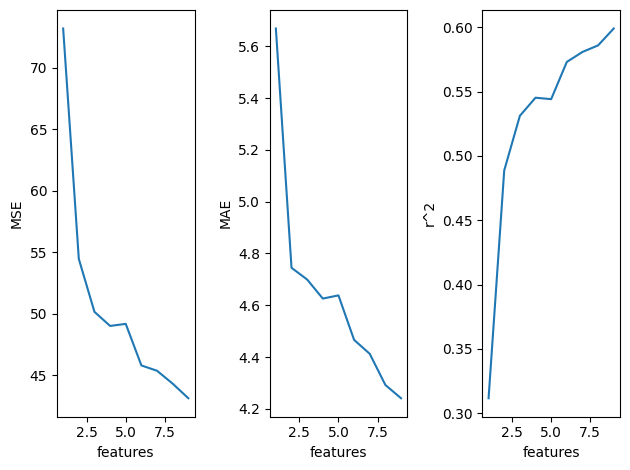

Selected features:  ['x1' 'x2' 'x5' 'x6' 'x7' 'x8' 'x9' 'x12' 'x13']
Model coefficients:  [ 0.14643227  0.43112496  0.07338891 -0.10878446 -0.09694367  0.06198223
 -0.7269852  -0.15909927  0.69986362]
Model intercept:  54.05796478472624


In [300]:
# Evaluate model using cross validation
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regr_cv = linear_model.LinearRegression()

    fselection_cv = RFE(regr_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        regr_cv = linear_model.LinearRegression()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)


####5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.


In [301]:
# Ajustar y evaluar el modelo KNN
model_knn = KNeighborsRegressor()
model_knn.fit(x, y)
y_pred_knn = model_knn.predict(x)

# Calcular métricas de evaluación
mse_knn = mean_squared_error(y, y_pred_knn)
mae_knn = mean_absolute_error(y, y_pred_knn)
r2_knn = r2_score(y, y_pred_knn)

print("K-Nearest Neighbors Metrics:")
print("Mean Squared Error (MSE):", mse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("R-squared (R2):", r2_knn)

K-Nearest Neighbors Metrics:
Mean Squared Error (MSE): 63.4017975493533
Mean Absolute Error (MAE): 5.659530292716133
R-squared (R2): 0.4053460977541794


####6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [302]:
# Agregar la variable "Status" como variable predictora
df_status = life_expectancy_data[['Adult Mortality', 'Status', 'infant deaths',
                                  'Alcohol', 'percentage expenditure', 'Measles ',
                                  ' BMI ', 'under-five deaths ', 'Total expenditure',
                                  'Diphtheria ', ' HIV/AIDS', 'Population',
                                  ' thinness  1-19 years',' thinness 5-9 years',
                                  'Schooling']]
df_status.head()

,Adult Mortality,Status,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,263.0,Developing,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,271.0,Developing,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,268.0,Developing,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,272.0,Developing,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,275.0,Developing,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


In [303]:
# Convertir a dummmies
df_status = pd.get_dummies(life_expectancy_data, columns = ['Status'], prefix = 'status')
status = df_status.to_numpy()

In [304]:
# Generamos el arbol de decision
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x, y)

DecisionTreeRegressor()

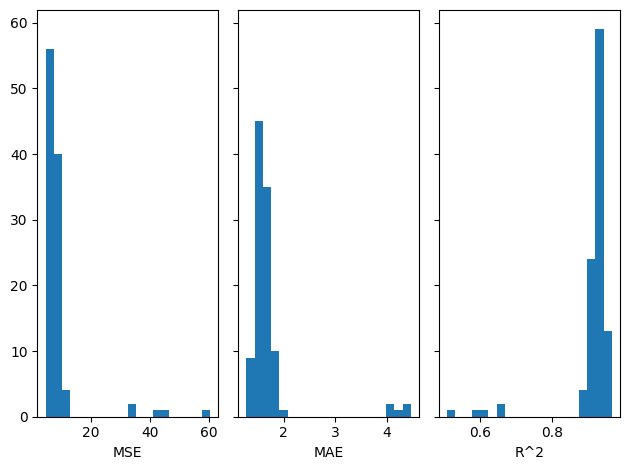

MSE: 9.255239494481069  MAE: 1.720098750677827  R^2: 0.9116486153799758


In [305]:
# Utilizamos Monte Carlo para nuestro modelo
monte_carlo = ShuffleSplit(n_splits=100)
r2_d = []
mse_d = []
mae_d = []

# Dividimos los datos en n particiones
for train_index, test_index in monte_carlo.split(status):

  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]

  decision_tree.fit(x_train, y_train)

  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]

  y_pred2 = decision_tree.predict(x_test)

  # Calculate MSE, MAE and R^2
  mse_i = mean_squared_error(y_test, y_pred2)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred2)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred2)
  r2_cv.append(r2_i)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

axs[2].hist(r2_cv, bins=20)
axs[2].set_xlabel("R^2")

plt.show()
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:', np.average(r2_cv))


####7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

**A. Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?**

En base a un alto valor promedio de Error Cuadrático Medio (MSE) de 39.96, obtenido en el punto uno, se concluye que el modelo de regresión lineal no es apropiado para estos datos. Este MSE indica que las predicciones del modelo están alejadas en promedio de los valores reales, lo que nos sugiere la presencia de una relación más compleja entre las variables.

**B. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**

Según los resultados obtenidos, podemos concluir que el método de selección de características tipo "wrapper" ha demostrado un rendimiento superior en comparación con el método "filter". Esto se refleja en los valores más bajos de MSE y MAE, así como en un valor más alto de R2 para el método "wrapper". Por lo tanto, para este conjunto de datos, el enfoque "wrapper" parece ser el más efectivo para la selección de características relevantes que contribuyen a un mejor rendimiento del modelo.

**C. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?**

Las características destacadas, identificadas en los tres métodos de selección (filter, wrapper y filter/wrapper), son las variables x2, x5 y x13. Estas variables se corresponden con: x2 - Número de muertes infantiles, x5 - Cobertura de vacunación contra la Hepatitis B y x13 - Producto Interno Bruto (PIB). La presencia constante de estas variables en las selecciones sugiere su relevancia en relación con la variable objetivo: Esperanza de Vida. Estos resultados respaldan la importancia de las tasas de mortalidad infantil, la cobertura de vacunas y el nivel de desarrollo económico (PIB) como factores influyentes en la predicción de la esperanza de vida.

**D. ¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?**

En base de los resultados obtenidos, es evidente que el modelo de regresión lineal superó en desempeño al modelo de regresión no lineal (K-vecinos). Esto se debe a que el modelo lineal exhibe un menor Mean Squared Error (MSE) y Mean Absolute Error (MAE), así como un valor de R-cuadrado (R2) más elevado en comparación con el modelo no lineal. Esto podría deberse a que la relación entre las variables en los datos podría estar más cercana a una relación lineal, lo que permitiría que el modelo lineal se ajustara de manera más precisa a los datos.

**E. ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?**

Al realizar el árbol de decisión parece que logramos una mejora significativa en el rendimiento del modelo. Esto se refleja en los valores más bajos de MSE, MAE y un R^2 más alto para el modelo basado en árbol de decisión en comparación con los modelos lineal y no lineal (K-vecinos). Al agregar esta variable categórica, podríamos haberle proporcionado al modelo de árbol de decisión información adicional para la toma de decisiones, lo que resulta en una mejor capacidad para capturar patrones y relaciones en los datos. Esto sugiere que la variable "Status" podría ser una variable predictora relevante en el modelo y ha contribuido significativamente a su capacidad de predicción mejorada.

**F. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.**

En resumen, se puede inferir que cierto conjunto de variables demuestran una significativa relevancia en la predicción de la esperanza de vida. La inclusión o exclusión de estas variables puede potencialmente mejorar los resultados del modelo y proporcionar una comprensión más clara de los elementos esenciales que influyen en las predicciones. Además, la realización de diversas técnicas de selección y su comparación representa un paso crucial para lograr un ajuste óptimo del modelo, lo que enfatiza la importancia de explorar varias estrategias de selección para obtener un modelo más efectivo.

In [ ]:
!apt-get install -y texlive-xetex

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Aprendizaje/tarea_aprendizaje_A01633784.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks/Aprendizaje'
